In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot(data):
    fig, ax = plt.subplots()
    plt.plot(data)
    plt.axhline(y=0, lw=.75, c='k')
    plt.grid()
    plt.show()

### Import Data

In [3]:
data = pd.read_csv('data.csv', index_col=0)
data.index = pd.to_datetime(data.index)
print(data.columns)

# US3M = 3 month usd libor

Index(['EURUSD', 'US3M', 'EUR3M', 'EUR3M fwd', 'EURIBOR'], dtype='object')


In [4]:
data

,EURUSD,US3M,EUR3M,EUR3M fwd,EURIBOR
Date,,,,,
2000-01-03,1.0243,6.00125,3.338,67.50,3.338
2000-01-04,1.0296,6.04250,3.343,69.70,3.343
2000-01-05,1.0321,6.03000,3.341,69.80,3.341
2000-01-06,1.0328,6.03000,3.331,69.50,3.331
2000-01-07,1.0295,6.03000,3.322,69.88,3.322
...,...,...,...,...,...
2019-11-14,1.1022,1.90413,-0.399,68.75,-0.399
2019-11-15,1.1051,1.90263,-0.404,68.44,-0.404
2019-11-18,1.1072,1.89850,-0.403,68.57,-0.403


### EUR/USD

In [5]:
eurusd_spot = data['EURUSD']
eurusd_fwd = data['EUR3M fwd'] / 100 / 100 + eurusd_spot
r = data['US3M'] / 100
rf = data['EURIBOR'] / 100


#basis = eurusd_fwd / eurusd_spot -  (1 + rf) / (1 + r)
basis = (eurusd_fwd - eurusd_spot) / eurusd_spot - (r - rf)


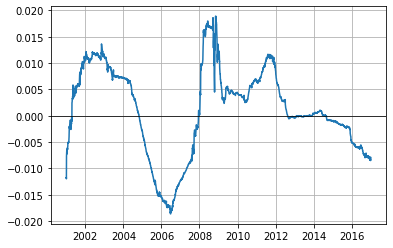

In [6]:
basis = basis['2001-01-01':'2016-12-31']

plot(basis)

### USD/EUR

In [7]:
usdeur_spot = 1 / data['EURUSD']
usdeur_fwd = 1 / (data['EUR3M fwd'] / 100 / 100 + eurusd_spot)
rf = data['US3M'] / 100
r = data['EURIBOR'] / 100


basis = usdeur_fwd / usdeur_spot -  (1 + rf) / (1 + r)
basis = (usdeur_fwd - usdeur_spot) / usdeur_spot - (r - rf)

Unsurprisingly, the graph is now mirrored:

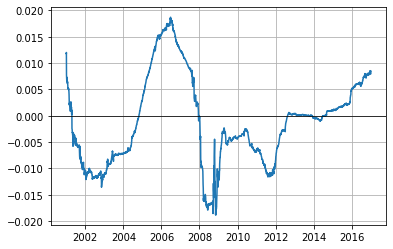

In [8]:
basis = basis['2001-01-01':'2016-12-31']
plot(basis)